# 背景
本节介绍线性代数基础知识，包括向量概念、向量计算

计算使用numpy以及pytorch，tensorflow实现

# 基本概念
> 可视化课程参考：https://www.bilibili.com/video/BV1ys411472E?p=2&vd_source=f15afd5dabb76e37c3fce13da41d7a0c
## 向量 Vector
Vectors, and vector spaces, are fundamental to *linear algebra*, and they're used in many machine learning models. Vectors describe spatial lines and planes, enabling you to perform calculations that explore relationships in multi-dimensional space.

实际上，我们在高中就学过向量的概念，例如重力，浮力都可以表现为有大小有方向的向量。

**在数学中我们把既有大小又有方向的量称为向量（vector)，而把只有大小没有方向的量成为数量。对应在物理中，向量称为矢量，数量称为标量。**

---
At its simplest, a vector is a numeric element that has both *magnitude* and *direction*. The magnitude represents a distance (for example, "2 miles") and the direction indicates which way the vector is headed (for example, "East"). **Vectors are defined by an n-dimensional coordinate that describe a point in space that can be connected by a line from an arbitrary origin.**

That all seems a bit complicated, so let's start with a simple, two-dimensional example. In this case, we'll have a vector that is defined by a point in a two-dimensional plane: A two dimensional coordinate consists of an *x* and a *y* value, and in this case we'll use **2** for *x* and **1** for *y*.

Our vector can be written as **v**=(2,1), but more formally we would use the following notation, in which the dimensional coordinate values for the vector are shown as a matrix:
\begin{equation}\vec{v} = \begin{bmatrix}2 \\ 1 \end{bmatrix}\end{equation}

So what exactly does that mean? Well, the coordinate is two-dimensional, and describes the movements required to get to the end point (of *head*) of the vector - in this case, we need to move 2 units in the *x* dimension, and 1 unit in the *y* dimension. Note that we don't specify a starting point for the vector - we're simply describing a destination coordinate that encapsulate the magnitide and direction of the vector. Think about it as the directions you need to follow to get to *there* from *here*, without specifying where *here* actually is!

It can help to visualize the vector, and with a two-dimensional vector, that's pretty straightforward. We just define a two-dimensional plane, choose a starting point, and plot the coordinate described by the vector relative to the starting point.

Run the code in the following cell to visualize the vector **v** (which remember is described by the coordinate (2,1)).
----
python中，一般使用行向量代表向量，但在数学运算中，常使用列向量代表向量

[[2]
 [1]]


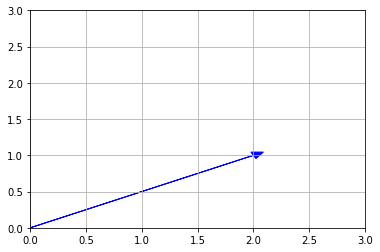

In [2]:
## 线性代数-向量numpy
 
import numpy as np
import matplotlib.pyplot as plt

# 我们使用numpy中的数组来表示向量
v = np.array([2,1])
vt=v.reshape(2,1)
print(vt)
# 绘制图像，展现向量的空间表达.
 
fig,axes=plt.subplots()
axes.set_xlim(0,3)
axes.set_ylim(0,3)
axes.grid()
axes.arrow(0,0,v[0],v[1],head_length=0.1,head_width=0.1,color='blue')
plt.show()

In [1]:
!pip3 install torch torchvision torchaudio



In [2]:
# 线性代数-向量torch
import torch as t
import matplotlib.pyplot as plt
vt=t.Tensor([2,1])
# 绘制图像，展现向量的空间表达.
 
fig,axes=plt.subplots()
axes.set_xlim(0,3)
axes.set_ylim(0,3)
axes.grid()
axes.arrow(0,0,vt[0],vt[1],head_length=0.1,head_width=0.1,color='blue')
plt.show()

ModuleNotFoundError: No module named 'torch'

## Calculating Vector Magnitude and Direction 向量大小与方向计算
We tend to work with vectors by expressing their components as *cartesian coordinates*; that is, *x* and *y* (and other dimension) values that define the number of units travelled along each dimension. So the coordinates of our (2,1) vector indicate that we must travel 2 units along the *x* axis, and *1* unit along the *y* axis.

However, you can also work with verctors in terms of their *polar coordinates*; that is coordinates that describe the magnitude and direction of the vector. The magnitude is the overall distance of the vector from tail to head, and the direction is the angle at which the vector is oriented.

### Calculating Magnitude
Calculating the magnitude of the vector from its cartesian coordinates requires measuring the distance between the arbitrary starting point and the vector head point. For a two-dimensional vector, we're actually just calculating the length of the hypotenuse in a right-angled triangle - so we could simply invoke Pythagorean theorum and calculate the square root of the sum of the squares of it's components, like this:

$$\begin{equation}\|\vec{v}\| = \sqrt{v_{1}\;^{2} + v_{2}\;^{2}}\end{equation}$$


The notation for a vector's magnitude is to surround the vector name with vertical bars - you can use single bars (for example, |**v**|) or double bars (||**v**||). Double-bars are often used to avoid confusion with absolute values. Note that the components of the vector are indicated by subscript indices (v<sub>1</sub>, v<sub>2</sub>,...v<sub>*n*</sub>),

In this case, the vector **v** has two components with values **2** and **1**, so our magnitude calculation is:

$$\begin{equation}\|\vec{v}\| = \sqrt{2^{2} + 1^{2}}\end{equation}$$

Which is:

$$ \begin{equation}\|\vec{v}\| = \sqrt{4 + 1}\end{equation}$$

So:

$$ \begin{equation}\|\vec{v}\| = \sqrt{5} \approx 2.24\end{equation}$$

You can run the following Python code to get a more precise result (note that the elements of a numpy array are zero-based)

In [6]:
## 线性代数-向量
# 向量大小计算
import numpy as np
import matplotlib.pyplot as plt
import torch as t 

# 我们使用numpy中的数组来表示向量
v = np.array([2,1])

magnitude=np.sqrt(np.square(v[0])+np.square(v[1]))
print("向量大小为：",magnitude)

vt=t.tensor([[2,1]]).T 
mangitute_t=t.sqrt(t.square(vt[0,0])+t.square(vt[1,0]))
print("torch计算得到向量大小为：",mangitute_t)

向量大小为： 2.23606797749979
torch计算得到向量大小为： tensor(2.2361)


也可以使用numpy中范数函数，以及tensor中范数函数来计算向量大小

---
This calculation works for vectors of any dimensionality - you just take the square root of the sum of the squared components:

$$ \begin{equation}\|\vec{v}\| = \sqrt{v_{1}\;^{2} + v_{2}\;^{2} ... + v_{n}\;^{2}}\end{equation}$$

In Python, *numpy* provides a linear algebra library named **linalg** that makes it easier to work with vectors - you can use the **norm** function in the following code to calculate the magnitude of a vector:

In [39]:
import numpy as np 
import torch as t 
vt=t.tensor([2,1],dtype=float)
print(vt)
norm=np.linalg.norm(v)
norm_t=t.linalg.norm(vt)
print("numpy计算得到范数：",norm)
print("pytorch计算得到范数：",norm_t)

tensor([2., 1.], dtype=torch.float64)
numpy计算得到范数： 2.23606797749979
pytorch计算得到范数： tensor(2.2361, dtype=torch.float64)


### Calculating Direction 计算方向 通过反函数
To calculate the direction, or *amplitude*, of a vector from its cartesian coordinates, you must employ a little trigonometry. We can get the angle of the vector by calculating the *inverse tangent*; sometimes known as the *arctan* (the *tangent*  calculates an angle as a ratio - the inverse tangent, or **tan<sup>-1</sup>**, expresses this in degrees).

In any right-angled triangle, the tangent is calculated as the *opposite* over the *adjacent*. In a two dimensional vector, this is the *y* value over the *x* value, so for our **v** vector (2,1):

$$ \begin{equation}tan(\theta) = \frac{1}{2}\end{equation} $$

This produces the result ***0.5***, from which we can use a calculator to calculate the inverse tangent to get the angle in degrees:

$$ \begin{equation}\theta = tan^{-1} (0.5) \approx 26.57^{o}\end{equation}$$

Note that the direction angle is indicated as ***&theta;***.

Run the following Python code to confirm this:

In [14]:
import numpy as np 
tan=v[1]/v[0]
print("向量对应tan值为：",tan)
arc=np.arctan(tan)
print("对应弧度为：",arc)
print("对应角度为：",np.degrees(arc))

向量对应tan值为： 0.5
对应弧度为： 0.4636476090008061
对应角度为： 26.56505117707799



here is an added complication however, because if the value for *x* or *y* (or both) is negative, the orientation of the vector is not standard, and a calculator can give you the wrong tan<sup>-1</sup> value. To ensure you get the correct direction for your vector, use the following rules:
- Both *x* and *y* are positive: Use the tan<sup>-1</sup> value.
- *x* is negative, *y* is positive: Add 180 to the tan<sup>-1</sup> value.
- Both *x* and *y* are negative: Add 180 to the tan<sup>-1</sup> value.
- *x* is positive, *y* is negative: Add 360 to the tan<sup>-1</sup> value.

To understand why we need to do this, think of it this way. A vector can be pointing in any direction through a 360 degree arc.  Let's break that circle into four quadrants with the x and y axis through the center. Angles can be measured from the x axis in both the positive (counter-clockwise) and negative (clockwise) directions. We'll number the quadrants in the positive (counter-clockwise) direction (which is how we measure the *positive* angle) like this:

    

    2 | 1
    - o -
    3 | 4


OK, let's look at 4 example vectors

 1. Vector [2,4] has positive values for both x and y. The line for this vector travels through the point 0,0 from quadrant 3 to quadrant 1. Tan<sup>-1</sup> of 4/2 is around 63.4 degrees, which is the positive angle from the x axis to the vector line - so this is the direction of the vector.
 2. Vector [-2,4] has a negative x and positive y. The line for this vector travels through point 0,0 from quadrant 4 to quadrant 2. Tan<sup>-1</sup> of 4/-2 is around -64.4 degrees, which is the *negative* angle from x to the vector line; but in the wrong direction (as if the vector was travelling from quadrant 2 towards quadrant 4). So we need the opposite direction, which we get by adding 180.
 3. Vector [-2,-4] has negative x and y. The line for the vector travels through 0,0 from quadrant 1 to quadrant 3. Tan<sup>-1</sup> of -4/-2 is around 63.4 degrees, which is the angle between the x axis and the line, but again in the opposite direction, from quadrant 3 to quadrant 1; we need to go a further 180 degrees to reflect the correct direction.
 4. Vector [2,-4] has positive x and negative y. It travels through 0,0 from quadrant 2 to quadrant 4. Tan<sup>-1</sup> of -4/2 is around -64.4 degrees, which is the *negative* angle from the x axis to the vector line. Technically it's correct, the line is travelleing down and to the right at an angle of -63.4 degrees; but we want to express the *positive* (counter-clockwise) angle, so we add 360.


In the previous Python code, we used the *math.**atan*** function to calculate the inverse tangent from a numeric tangent. The *numpy* library includes a similar ***arctan*** function. When working with numpy arrays, you can also use the *numpy.**arctan2*** function to return the inverse tangent of an array-based vector in *radians*, and you can use the *numpy.**degrees*** function to convert this to degrees. The ***arctan2*** function automatically makes the necessary adjustment for negative *x* and *y* values.

This calculation works for vectors of any dimensionality - you just take the square root of the sum of the squared components:

$$ \begin{equation}\|\vec{v}\| = \sqrt{v_{1}\;^{2} + v_{2}\;^{2} ... + v_{n}\;^{2}}\end{equation}$$

In Python, *numpy* provides a linear algebra library named **linalg** that makes it easier to work with vectors - you can use the **norm** function in the following code to calculate the magnitude of a vector:

## Vector Addition 向量的加法
So far, we've worked with one vector at a time. What happens when you need to add two vectors.

Let's take a look at an example, we already have a vector named **v**, as defined here:
$\begin{equation}\vec{v} = \begin{bmatrix}2 \\ 1 \end{bmatrix}\end{equation}$
Now let's create a second vector, and called **s** like this:
$\begin{equation}\vec{s} = \begin{bmatrix}-3 \\ 2 \end{bmatrix}\end{equation}$

Run the cell below to create **s** and plot it together with **v**:

向量相加结果： [-1  3]
tensor向量相加结果: tensor([-1,  3])


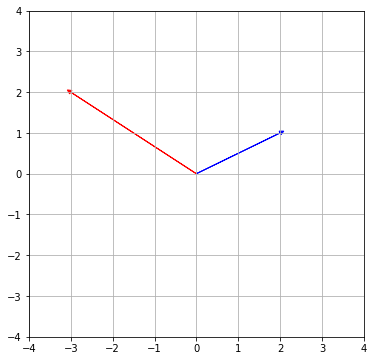

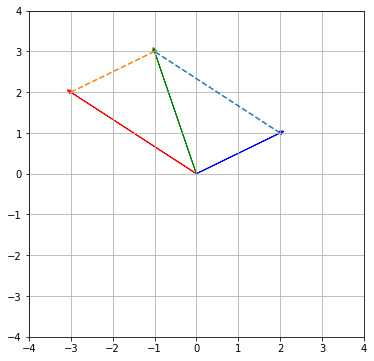

向量相减结果： [ 5 -1]


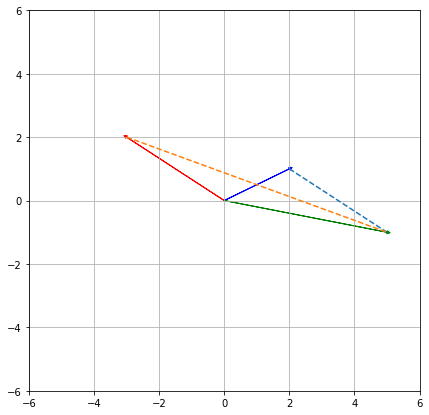

In [44]:
import matplotlib.pyplot as plt 
import numpy as np 
import torch as t 
fig,axes=plt.subplots()
fig.set_size_inches(6,6)
v=np.array([2,1])
s=np.array([-3,2])
axes.set_xlim(-4,4)
axes.set_ylim(-4,4)
axes.arrow(0,0,v[0],v[1],head_length=0.1,head_width=0.1,color='blue')
axes.arrow(0,0,s[0],s[1],head_length=0.1,head_width=0.1,color='red')
axes.grid()
###torch 实现
vt=t.tensor([2,1])
st=t.tensor([-3,2])

z=v+s
print("向量相加结果：",z)
zt=vt+st
print("tensor向量相加结果:",zt)

import matplotlib.pyplot as plt 
import numpy as np 
fig,axes=plt.subplots()
fig.set_size_inches(6,6)
v=np.array([2,1])
s=np.array([-3,2])
axes.set_xlim(-4,4)
axes.set_ylim(-4,4)
axes.arrow(0,0,v[0],v[1],head_length=0.1,head_width=0.1,color='blue')
axes.arrow(0,0,s[0],s[1],head_length=0.1,head_width=0.1,color='red')
axes.grid()
axes.arrow(0,0,z[0],z[1],head_length=0.1,head_width=0.1,color='green')
axes.plot([v[0],z[0]],[v[1],z[1]],'--')
axes.plot([s[0],z[0]],[s[1],z[1]],'--')
plt.show()
import matplotlib.pyplot as plt 
import numpy as np 
z=v-s
print("向量相减结果：",z)
fig,axes=plt.subplots()
fig.set_size_inches(7,7)
v=np.array([2,1])
s=np.array([-3,2])
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)
axes.arrow(0,0,v[0],v[1],head_length=0.1,head_width=0.1,color='blue')
axes.arrow(0,0,s[0],s[1],head_length=0.1,head_width=0.1,color='red')
axes.grid()
axes.arrow(0,0,z[0],z[1],head_length=0.1,head_width=0.1,color='green')
axes.plot([v[0],z[0]],[v[1],z[1]],'--')
axes.plot([s[0],z[0]],[s[1],z[1]],'--')
plt.show()

You can see in the plot that the two vectors have different directions and magnitudes. So what happens when we add them together?

Here's the formula:
\begin{equation}\vec{z} = \vec{v}+\vec{s}\end{equation}

In terms of our vector matrices, this looks like this:
$$\begin{equation}\vec{z} = \begin{bmatrix}2 \\ 1 \end{bmatrix} + \begin{bmatrix}-3 \\ 2 \end{bmatrix}\end{equation}$$

Which gives the following result:
$$\begin{equation}\vec{z} = \begin{bmatrix}2 \\ 1 \end{bmatrix} + \begin{bmatrix}-3 \\ 2 \end{bmatrix} = \begin{bmatrix}-1 \\ 3 \end{bmatrix}\end{equation}$$

Let's verify that Python gives the same result:

So what's going on here?
Well, we added the dimensions of **s** to the dimensions of **v** to describe a new vector **z**. Let's break that down:
- The dimensions of **v** are (2,1), so from our starting point we move 2 units in the *x* dimension (across to the right) and 1 unit in the *y* dimension (up). In the plot, if you start at the (0,0) position, this is shown as the red arrow.
- Then we're adding **s**, which has dimension values (-3, 2), so we move -3 units in the *x* dimension (across to the left, because it's a negative number) and then 2 units in the *y* dimension (up). On the plot, if you start at the head of the red arrow and make these moves, you'll end up at the head of the green arrow, which represents **z**.

The same is true if you perform the addition operation the other way around and add **v** to **s**, the steps to create **s** are described by the blue arrow, and if you use that as the starting point for **v**, you'll end up at the head of the green arrow, which represents **z**.

Note on the plot that if you simply moved the tail of the blue arrow so that it started at the head of red arrow, its head would end up in the same place as the head of the green arrow; and the same would be true if you moved tail of the red arrow to the head of the blue arrow.

## Vector Multiplication 向量乘法 标量相乘 内积 外积
Vector multiplication can be performed in three ways:

- Scalar Multiplication
- Dot Product Multiplication
- Cross Product Multiplication

## Scalar Multiplication 标量相乘
Let's start with *scalar* multiplication - in other words, multiplying a vector by a single numeric value.

Suppose I want to multiply my vector by 2, which I could write like this:

$$ \begin{equation} \vec{w} = 2\vec{v}\end{equation} $$

Note that the result of this calculation is a new vector named **w**. So how would we calculate this?
Recall that **v** is defined like this:

 $$ \begin{equation}\vec{v} = \begin{bmatrix}2 \\ 1 \end{bmatrix}\end{equation} $$

To calculate 2v, we simply need to apply the operation to each dimension value in the vector matrix, like this:

$$ \begin{equation}\vec{w} = \begin{bmatrix}2 \cdot 2 \\  2 \cdot 1 \end{bmatrix}\end{equation}$$

Which gives us the following result:

$$ \begin{equation}\vec{w} = \begin{bmatrix}2 \cdot 2 \\  2 \cdot 1 \end{bmatrix} = \begin{bmatrix}4 \\ 2 \end{bmatrix}\end{equation}$$

In Python, you can apply these sort of matrix operations directly to numpy arrays, so we can simply calculate **w** like this:

[4 2]
tensor([4, 2])


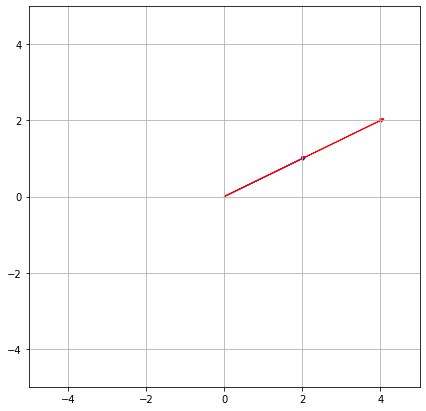

In [45]:
import numpy as np 
import matplotlib.pyplot as plt 
w=2*v
wt=2*vt
print(w)
print(wt)
fig,axes=plt.subplots()
fig.set_size_inches(7,7)
v=np.array([2,1])
 
axes.set_xlim(-5,5)
axes.set_ylim(-5,5)
axes.arrow(0,0,v[0],v[1],head_length=0.1,head_width=0.1,color='blue')
axes.arrow(0,0,w[0],w[1],head_length=0.1,head_width=0.1,color='red')
axes.grid()
 
plt.show()

The same approach is taken for scalar division.

Try it for yourself - use the cell below to calculate a new vector named **b** based on the following definition:

\begin{equation}\vec{b} = \frac{\vec{v}}{2}\end{equation}

## Dot Product Multiplication 点积（内积）
向量（注意不是矩阵）的内积可以理解为一个与平面有 $ \theta$ 夹角的力$ v $，与平面上的力$ u $ 的合力

So we've seen how to multiply a vector by a scalar. How about multiplying two vectors together? There are actually two ways to do this depending** on whether you want the result to be a *scalar product* (in other words, a number) or a *vector product* (a vector).**
> 使用内积，得到的是一个标量，其几何意义为 $ u \cdot v=|u||v|cos\theta $ 表示向量u在向量v方向上的投影长度乘向量v的模长。 如果v是单位向量，内积就可以直接描述为向量u在向量v方向上的投影长度

To get a scalar product, we calculate the *dot product*. This takes a similar approach to multiplying a vector by a scalar, except that it multiplies each component pair of the vectors and sums the results. To indicate that we are performing a dot product operation, we use the &bull; operator:

$$\begin{equation} \vec{v} \cdot \vec{s} = (v_{1} \cdot s_{1}) + (v_{2} \cdot s_{2}) ... + \; (v_{n} \cdot s_{n})\end{equation}$$

So for our vectors **v** (2,1) and **s** (-3,2), our calculation looks like this:

$$\begin{equation} \vec{v} \cdot \vec{s} = (2 \cdot -3) + (1 \cdot 2) = -6 + 2 = -4\end{equation}$$

So the dot product, or scalar product, of **v** &bull; **s** is **-4**.

In Python, you can use the *numpy.**dot*** function to calculate the dot product of two vector arrays:
>很重要的一点是：向量A与向量B的点积 并不等于 向量B与向量A的点积，我们用A·B表示两个向量的点积运算，则A·B!=B·A

>假如要计算 A·B，那么，A(点击号前面的向量)中x方向元素的数量应该于B(点积号后面的向量)中y方向的数量相同

In [2]:
import numpy as np 
import matplotlib.pyplot as plt  
v=np.array([2,3,3])
u=np.array([3,5,-1])
s=np.dot(u,v)
s1=np.dot(v,u)
print(s)
print(s1)
# 内积也可以用@ 代替,以下为矩阵的内积
v2=np.array([2,3,3,3,2,1]).reshape(2,3)
u2=np.array([3,5,-1,3,5,-1]).reshape(3,2)
print("多维度向量内积结果", v2@u2)

import torch as t
vt=t.tensor([2,3,3])
ut=t.tensor([3,5,-1])
vt@ut

18
18
多维度向量内积结果 [[18 16]
 [12 20]]


C:\Users\tomis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\cuda\__init__.py:83: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


tensor(18)

向量$\vec{v}$与矩阵$A$的内积结果，为$\vec{v}$ 通过$A$所构成的空间，在新空间上进行转换。

## Cross Product Multiplication 向量的外积（叉积）
向量的外积cross得到的
To get the *vector product* of multipying two vectors together, you must calculate the *cross product*. The result of this is a new vector that is at right angles to both the other vectors in 3D Euclidean space. This means that the cross-product only really makes sense when working with vectors that contain three components.

For example, let's suppose we have the following vectors:
$$
\begin{equation}\vec{p} = \begin{bmatrix}2 \\ 3 \\ 1 \end{bmatrix}\;\; \vec{q} = \begin{bmatrix}1 \\ 2 \\ -2 \end{bmatrix}\end{equation}
$$
To calculate the cross product of these vectors, written as **p** x **q**, we need to create a new vector (let's call it **r**) with three components (r<sub>1</sub>, r<sub>2</sub>, and r<sub>3</sub>). The values for these components are calculated like this:
$$
\begin{equation}r_{1} = p_{2}q_{3} - p_{3}q_{2}\end{equation}
\begin{equation}r_{2} = p_{3}q_{1} - p_{1}q_{3}\end{equation}
\begin{equation}r_{3} = p_{1}q_{2} - p_{2}q_{1}\end{equation}
$$
So in our case:
$$
\begin{equation}\vec{r} = \vec{p} \times \vec{q} = \begin{bmatrix}(3 \cdot -2) - (1 \cdot 2) \\ (1 \cdot 1) - (2 \cdot -2) \\ (2 \cdot 2) - (3 \cdot 1) \end{bmatrix} = \begin{bmatrix}-6 - 2 \\ 1 - -4 \\ 4 - 3 \end{bmatrix} = \begin{bmatrix}-8 \\ 5 \\ 1 \end{bmatrix}\end{equation}
$$
In Python, you can use the *numpy.**cross*** function to calculate the cross product of two vector arrays:

---
在二维平面中，向量$v$ 与向量 $u$ 的cross运算法则为：
$$ u\times v =\begin{bmatrix} u_1 \\ u_2 \end{bmatrix} \times \begin{bmatrix}v_1\\v_2 \end{bmatrix}=u_1v_2-u_2v_1 $$

在二维平面中，向量的cross表示两个相连章草的平行四边形的“面积”，当然如果如果两个向量的夹角大于180，那么相连外积运算得到的结果为负数。

在三维空间中，cross的结果也是有明确的物理含义的，即表示$u$ 和$v$ 两个向量张成平面的法向量。

In [ ]:
import numpy as np 
u=np.array([2,1])
v=np.array([-3,2])
u_v_cross=np.cross(u,v)
print(u_v_cross)
# 三维向量的外积
u2=np.array([2,1,2])
v2=np.array([-3,2,3])
print(np.cross(u2,v2))

### 余弦相似度
通过向量$cos \Theta$得到多个向量之间的夹角，如果$cos \theta$越小，意味向量越接近。
### The Cosine Rule
An useful property of vector dot product multiplication is that we can use it to calculate the cosine of the angle between two vectors. We could write the dot products as:

$$ \vec{v} \cdot \vec{s} = \|\vec{v} \|\|\vec{s}\| \cos (\theta) $$ 

Which we can rearrange as:

$$ \cos(\theta) = \frac{\vec{v} \cdot \vec{s}}{\|\vec{v} \|\|\vec{s}\|} $$

So for our vectors **v** (2,1) and **s** (-3,2), our calculation looks like this:

$$ \cos(\theta) = \frac{(2 \cdot-3) + (-3 \cdot 2)}{\sqrt{2^{2} + 1^{2}} \times \sqrt{-3^{2} + 2^{2}}} $$

So:

$$\cos(\theta) = \frac{-4}{8.0622577483}$$

Which calculates to:

$$\cos(\theta) = -0.496138938357 $$

So:

$$\theta \approx 119.74 $$

---

### 向量的正交
结合内积定义，如果向量$v \ times u=0$即两向量点积为0，那么他们在空间上是正交关系,$cos(90)=0$

Here's that calculation in Python:


In [30]:
import numpy as np

v1=np.array([2,1])
v2=np.array([-3,2])
v3=np.array([-9,2])
def cos_sim(v1,v2):
    v12=v1@v2  #"v1在v2向量上的投影长度与v2的范数相乘："
    v1_n=np.linalg.norm(v1)#v1范数
    v2_n=np.linalg.norm(v2)#v2范数
    cos_v12=v12/(v1_n*v2_n)#两向量对应cos值
    arc=np.arccos(cos_v12)#通过反函数求得对应弧度
    degree=np.degrees(arc)#求得对应角度
    return degree
if __name__== "__main__":

    degree1=cos_sim(v1,v2)
    degree2=cos_sim(v1,v3)
    print("v1,v2向量间夹角",degree1)
    print("v1,v3向量间夹角",degree2)

v1,v2向量间夹角 119.74488129694222
v1,v3向量间夹角 140.9061411137705
